# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.133450e+01     1.546826e+01
 * time: 0.0033049583435058594
     1     6.215694e+01     9.858627e+00
 * time: 0.009825944900512695
     2     5.435446e+01     1.249186e+01
 * time: 0.024944067001342773
     3     4.126294e+01     9.785184e+00
 * time: 0.0460820198059082
     4     3.241501e+01     9.283757e+00
 * time: 0.13848590850830078
     5     1.338412e+01     3.861919e+00
 * time: 0.1594851016998291
     6     1.029292e+01     3.416904e+00
 * time: 0.17468690872192383
     7     8.914090e+00     3.016509e+00
 * time: 0.18997502326965332
     8     8.614796e+00     5.297724e+00
 * time: 0.2023029327392578
     9     7.798873e+00     2.911465e+00
 * time: 0.2174971103668213
    10     7.148277e+00     3.637036e+00
 * time: 0.2298259735107422
    11     6.552808e+00     3.089666e+00
 * time: 0.2784709930419922
    12     6.153124e+00     1.670660e+00
 * time: 0.29078006744384766
    13     5.960477e+00     1.688631e+00
 * time: 0

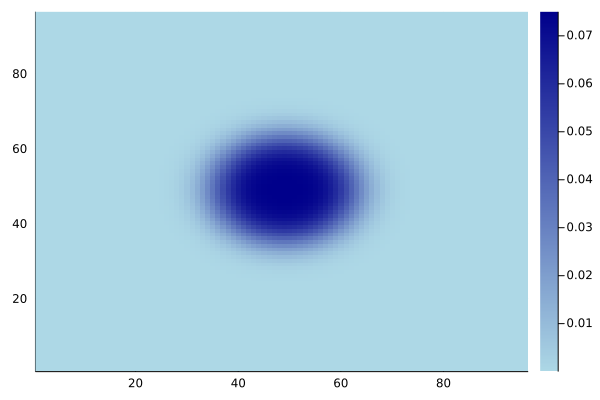

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)

# Parameters
Ecut = 50
n_electrons = 1
β = 5

terms = [Kinetic(2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
display(heatmap(scfres.ρ[:, :, 1, 1], c=:blues))